In [1]:
# -*- coding: utf-8 -*-
from __future__ import division
import sys
sys.path.append('C:\\Users\\51951\\PycharmProjects\\joinquantNew\\gpLearn')
import pandas as pd
import numpy as np
import time  
import datetime
from matplotlib import cm, pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from factors201 import *
import inspect
from jqdatasdk import *
from configDB import *
import os
auth(JOINQUANT_USER, JOINQUANT_PW)
from scipy import stats
import math
import warnings
warnings.filterwarnings("ignore")

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [2]:
colums_lst = ["alpha801", "alpha802", "alpha803", "alpha804", "alpha805"]
colums_lst.extend(['date_time', 'close', 'future_ret'])
feature_lst = ["alpha801", "alpha802", "alpha803", "alpha804", "alpha805"]

In [3]:
sdate = '2014-01-01'
stock_lst = ['C', 'CS', 'A', 'B', 'M', 'RM', 'Y', 'P', 'OI', 'L', 'V', 'PP', 'TA', 'RU', 'BU', 'MA', 'SC', 'FU',
                  'AL', 'ZN', 'CU', 'PB', 'NI', 'SN', 'J', 'JM', 'I', 'RB', 'HC', 'ZC', 'SF', 'SM', 'FG', 'IF',
                  'IH', 'IC', 'T', 'TF', 'AG', 'AU', 'JD', 'AP', 'CJ', 'CF', 'SR']

In [4]:
len(stock_lst)

45

In [5]:
resualt_path = 'c:/e/data/factor/'
future_period = 20
indicator_ori = []
for code in stock_lst:
    ret = pd.read_csv(resualt_path + 'indicator_%s%s.csv' % (code, future_period), encoding='gbk', index_col=0)[colums_lst]
    ret['symbol'] = code
    indicator_ori.append(ret)
indicator_ori = pd.concat(indicator_ori)

In [6]:
len(indicator_ori), len(indicator_ori.dropna())

(68947, 61252)

In [7]:
indicator_df_day = indicator_ori[indicator_ori['date_time'] == '2020-10-20'].drop(['date_time', 'close', 'future_ret'], axis=1)\
.set_index(['symbol'])

In [8]:
indicator_df_day

,alpha801,alpha802,alpha803,alpha804,alpha805
symbol,,,,,
C,0.963257,0.374339,0.013049,0.000016,0.000002
CS,0.878367,0.496646,0.150111,0.001747,0.000042
A,0.783966,0.955034,0.815842,0.461732,0.834463
B,0.012722,0.621076,0.327866,0.032878,0.145197
M,0.916010,0.913707,0.317230,0.188251,0.259779
RM,0.684912,0.752733,0.867283,0.608246,0.562321
Y,-0.784543,0.308351,0.489866,0.021597,0.075018
P,-0.821095,-0.003777,0.911438,0.085524,0.115983
OI,-0.641886,0.462159,0.925572,0.042917,0.000065


## 去极值

In [12]:
def de_extreme(indicator_df_day, feature_lst):
    indicator_df_day_temp = copy.deepcopy(indicator_df_day)
    MAD = abs(indicator_df_day_temp - indicator_df_day_temp.median())
    MAX=indicator_df_day_temp.median() + 3 * 1.4826 * MAD.median()
    MIN=indicator_df_day_temp.median() - 3 * 1.4826 * MAD.median()
    for alpha in feature_lst:
        ori = copy.deepcopy(indicator_df_day_temp[alpha])
        series = copy.deepcopy(ori)
        series[series>MAX[alpha]] = MAX[alpha]
        series[series<MIN[alpha]] = MIN[alpha]
        indicator_df_day_temp[alpha] = copy.deepcopy(series)
        df = pd.DataFrame({'ori': ori, 'de_extreme': indicator_df_day_temp[alpha]})\
        .reset_index(drop=True)
#         plt.subplots(20, 10)
        df.loc[:, ['ori', 'de_extreme']].plot()
        plt.legend()
        plt.title('%s ori_max:%s deal_max:%s ori_min:%s deal_min:%s' %(
            alpha, np.around(ori.max(), 2), np.around(series.max(), 2), np.around(ori.min(), 2), 
                  np.around(series.min(), 2)))
        plt.show()
    return(indicator_df_day_temp)

def de_extreme_noplot(indicator_df_day, feature_lst):
    indicator_df_day_temp = copy.deepcopy(indicator_df_day)
    MAD = abs(indicator_df_day_temp - indicator_df_day_temp.median())
    MAX=indicator_df_day_temp.median() + 3 * 1.4826 * MAD.median()
    MIN=indicator_df_day_temp.median() - 3 * 1.4826 * MAD.median()
    for alpha in feature_lst:
        ori = copy.deepcopy(indicator_df_day_temp[alpha])
        series = copy.deepcopy(ori)
        series[series>MAX[alpha]] = MAX[alpha]
        series[series<MIN[alpha]] = MIN[alpha]
        indicator_df_day_temp[alpha] = copy.deepcopy(series)
    return(indicator_df_day_temp)

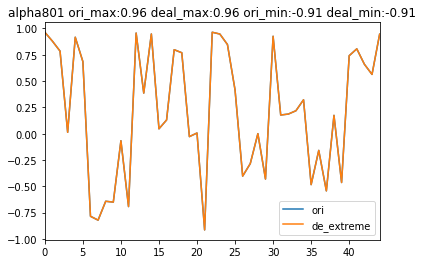

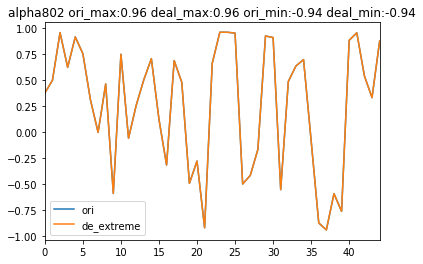

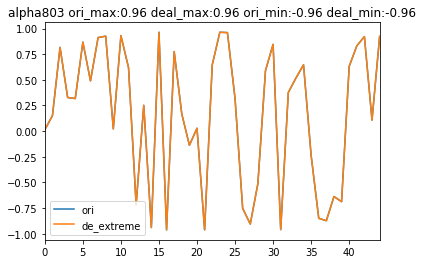

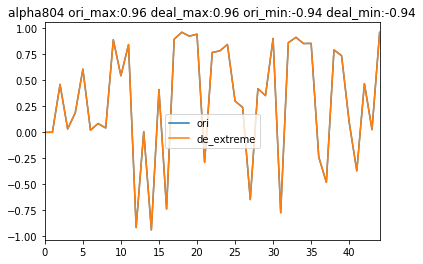

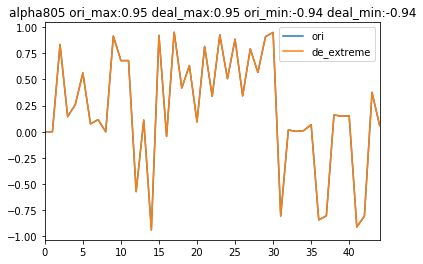

In [10]:
indicator_df_day_temp = de_extreme(indicator_df_day, feature_lst)

## 因子标准化

In [11]:
# 标准化函数：
def standardize(s, ty=1):
    '''
    s为Series数据
    ty为标准化类型:1 MinMax,2 Standard,3 maxabs
    '''
    data = s.dropna().copy()
    if int(ty) == 1:
        re = (data - data.min()) / (data.max() - data.min())
    elif ty == 2:
        re = (data - data.mean()) / data.std()
    elif ty == 3:
        re = data / 10 ** np.ceil(np.log10(data.abs().max()))
    return re

def standardize_df_noplot(indicator_df_day, ty=1):
    indicator_df_day_temp = copy.deepcopy(indicator_df_day)
    for alpha in feature_lst:
        ori = copy.deepcopy(indicator_df_day_temp[alpha])
        series = copy.deepcopy(ori)
        series = standardize(series, ty)
        indicator_df_day_temp[alpha] = copy.deepcopy(series)
    return(indicator_df_day_temp)

def standardize_df(indicator_df_day, ty=1):
    indicator_df_day_temp = copy.deepcopy(indicator_df_day)
    for alpha in feature_lst:
        ori = copy.deepcopy(indicator_df_day_temp[alpha])
        series = copy.deepcopy(ori)
        series = standardize(series, ty)
        indicator_df_day_temp[alpha] = copy.deepcopy(series)
        df = pd.DataFrame({'ori': ori, 'std': indicator_df_day_temp[alpha]})\
        .reset_index(drop=True)
#         plt.subplots(20, 10)
        df.loc[:, ['ori', 'std']].plot()
        plt.legend()
        plt.title('%s ori_max:%s deal_max:%s ori_min:%s deal_min:%s' %(
            alpha, np.around(ori.max(), 2), np.around(series.max(), 2), np.around(ori.min(), 2), 
                  np.around(series.min(), 2)))
        plt.show()
    return(indicator_df_day_temp)

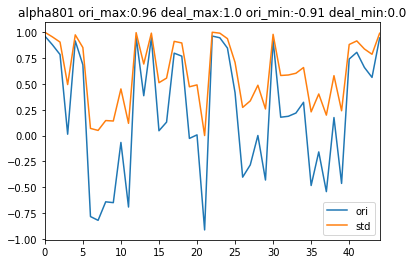

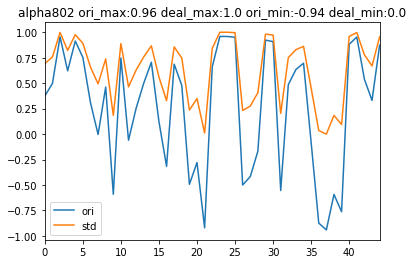

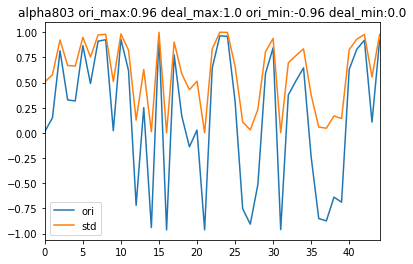

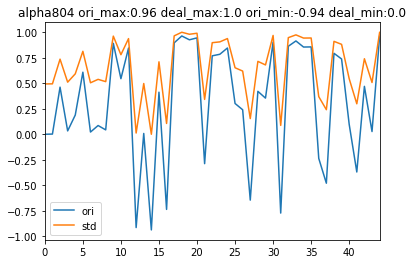

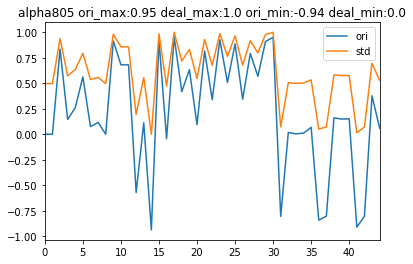

In [12]:
indicator_df_day_std = standardize_df(indicator_df_day_temp)

In [13]:
calen = get_trade_days('2014-01-01', '2020-12-08')

In [14]:
factor_deal=indicator_df_day_std
factor_deal

,alpha801,alpha802,alpha803,alpha804,alpha805
symbol,,,,,
C,1.000000,0.692346,0.506678,0.493248,0.496460
CS,0.954778,0.756740,0.577800,0.494159,0.496481
A,0.904488,0.998078,0.923251,0.736103,0.938063
B,0.493632,0.822252,0.670038,0.510533,0.573299
M,0.974831,0.976320,0.664519,0.592256,0.633936
RM,0.851720,0.891568,0.949944,0.813167,0.794044
Y,0.068913,0.657603,0.754100,0.504599,0.536160
P,0.049441,0.493270,0.972856,0.538224,0.557838
OI,0.144909,0.738582,0.980190,0.515813,0.496494


## 标准化处理后因子相关系数

In [15]:
factor_deal.corr()

,alpha801,alpha802,alpha803,alpha804,alpha805
alpha801,1.000000,0.659995,0.289054,0.053017,-0.104579
alpha802,0.659995,1.000000,0.761016,0.225399,0.163803
alpha803,0.289054,0.761016,1.000000,0.549231,0.340910
alpha804,0.053017,0.225399,0.549231,1.000000,0.529527
alpha805,-0.104579,0.163803,0.340910,0.529527,1.000000


## 对所有日期进行因子处理

In [8]:
indicator_ori = indicator_ori.dropna()
indicator_df_ = indicator_ori.drop(['close', 'future_ret'], axis=1)
indicator_df_

,alpha801,alpha802,alpha803,alpha804,alpha805,date_time,symbol
151,0.963751,0.945198,0.883863,0.482165,0.073459,2014-08-14,C
152,0.896392,0.879749,0.793610,0.388343,0.072407,2014-08-15,C
153,0.953619,0.893117,0.774717,0.372512,0.088870,2014-08-18,C
154,0.790015,0.958696,0.833830,0.419756,0.123951,2014-08-19,C
155,0.491236,0.958201,0.868069,0.446620,0.149019,2014-08-20,C
...,...,...,...,...,...,...,...
1638,0.484434,0.652321,0.786403,0.892001,-0.662183,2020-09-18,SR
1639,0.586061,0.625512,0.748664,0.924689,-0.576302,2020-09-21,SR
1640,0.912941,0.766618,0.784779,0.930211,-0.521986,2020-09-22,SR
1641,0.963657,0.826966,0.795604,0.939294,-0.459948,2020-09-23,SR


In [13]:
try:
    indicator_deal = pd.read_csv('c:/e/data/factor/inicator_future%s.csv' %future_period)
except:
    indicator_deal = []
    for date, group in indicator_df_.groupby(['date_time']):
        if date<'2015-01-01':
            continue
        print(date)
        try:
            indicator_deal.append(pd.read_csv('c:/e/data/factor/date_future/inicator_%s%s.csv' %(date, future_period)))
        except:

            group = group.drop(['date_time'], axis=1)
            group = group.set_index(['symbol'])
            indicator_df_day_de_extreme = de_extreme_noplot(group, feature_lst) # 去极值
            factor_deal = standardize_df_noplot(indicator_df_day_de_extreme) # 标准化
            factor_deal = factor_deal.reset_index(drop=False)
            factor_deal['date_time'] = date
            factor_deal.to_csv('c:/e/data/factor/date_future/inicator_%s%s.csv' %(date, future_period), index=False)
            indicator_deal.append(factor_deal)
    indicator_deal = pd.concat(indicator_deal) 
    print(indicator_deal)
    indicator_deal.to_csv('c:/e/data/factor/inicator_future%s.csv' %future_period, index=False)

2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-12
2015-01-13
2015-01-14
2015-01-15
2015-01-16
2015-01-19
2015-01-20
2015-01-21
2015-01-22
2015-01-23
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-02-02
2015-02-03
2015-02-04
2015-02-05
2015-02-06
2015-02-09
2015-02-10
2015-02-11
2015-02-12
2015-02-13
2015-02-16
2015-02-17
2015-02-25
2015-02-26
2015-02-27
2015-03-02
2015-03-03
2015-03-04
2015-03-05
2015-03-06
2015-03-09
2015-03-10
2015-03-11
2015-03-12
2015-03-13
2015-03-16
2015-03-17
2015-03-18
2015-03-19
2015-03-20
2015-03-23
2015-03-24
2015-03-25
2015-03-26
2015-03-27
2015-03-30
2015-03-31
2015-04-01
2015-04-02
2015-04-03
2015-04-07
2015-04-08
2015-04-09
2015-04-10
2015-04-13
2015-04-14
2015-04-15
2015-04-16
2015-04-17
2015-04-20
2015-04-21
2015-04-22
2015-04-23
2015-04-24
2015-04-27
2015-04-28
2015-04-29
2015-04-30
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-18
2015-05-19
2015-05-20

2018-01-19
2018-01-22
2018-01-23
2018-01-24
2018-01-25
2018-01-26
2018-01-29
2018-01-30
2018-01-31
2018-02-01
2018-02-02
2018-02-05
2018-02-06
2018-02-07
2018-02-08
2018-02-09
2018-02-12
2018-02-13
2018-02-14
2018-02-22
2018-02-23
2018-02-26
2018-02-27
2018-02-28
2018-03-01
2018-03-02
2018-03-05
2018-03-06
2018-03-07
2018-03-08
2018-03-09
2018-03-12
2018-03-13
2018-03-14
2018-03-15
2018-03-16
2018-03-19
2018-03-20
2018-03-21
2018-03-22
2018-03-23
2018-03-26
2018-03-27
2018-03-28
2018-03-29
2018-03-30
2018-04-02
2018-04-03
2018-04-04
2018-04-09
2018-04-10
2018-04-11
2018-04-12
2018-04-13
2018-04-16
2018-04-17
2018-04-18
2018-04-19
2018-04-20
2018-04-23
2018-04-24
2018-04-25
2018-04-26
2018-04-27
2018-05-02
2018-05-03
2018-05-04
2018-05-07
2018-05-08
2018-05-09
2018-05-10
2018-05-11
2018-05-14
2018-05-15
2018-05-16
2018-05-17
2018-05-18
2018-05-21
2018-05-22
2018-05-23
2018-05-24
2018-05-25
2018-05-28
2018-05-29
2018-05-30
2018-05-31
2018-06-01
2018-06-04
2018-06-05
2018-06-06
2018-06-07

In [14]:
future_period

20

In [15]:
indicator_deal

,symbol,alpha801,alpha802,alpha803,alpha804,alpha805,date_time
0,C,0.622374,0.240210,0.396572,1.000000,1.000000,2015-01-05
1,A,0.999936,0.996252,1.000000,0.554643,0.000000,2015-01-05
2,B,0.000000,0.017765,0.026017,0.007123,0.019035,2015-01-05
3,M,0.199420,0.161954,0.086834,0.113559,0.520720,2015-01-05
4,RM,0.238064,0.275609,0.470942,0.128976,0.000000,2015-01-05
...,...,...,...,...,...,...,...
40,JD,0.742197,0.426609,0.042454,0.095377,0.284017,2020-09-24
41,AP,0.396588,0.503457,0.195897,0.158232,0.250602,2020-09-24
42,CJ,0.084692,0.895952,1.000000,0.556933,0.298966,2020-09-24
43,CF,0.650021,0.909230,0.916795,0.640795,0.959959,2020-09-24


## 单因子检验 ICIR

In [16]:
# 计算IC值
def IC_cal(df, feature_lst):
    num = 0
    for i in feature_lst:
        t = df.loc[:, ['date_time', 'future_ret', i]].dropna()
        tmp = t.groupby('date_time').apply(lambda df: df.corr().iloc[0, 1]) \
            .reset_index().rename(columns={0: i})
        if num == 0:
            ret = tmp
        else:
            ret = pd.merge(ret, tmp, on=['date_time'], how='outer')
        num += 1
    return ret

# 计算rank_IC值
def rankIC_cal(df, feature_lst):
    num = 0
    for i in feature_lst:
        t = df.loc[:, ['date_time', 'future_ret', i]].dropna()
        t[i] = t[i].rank(ascending=True)
        tmp = t.groupby('date_time').apply(lambda df: df.corr().iloc[0, 1]) \
            .reset_index().rename(columns={0: i})
        if num == 0:
            ret = tmp
        else:
            ret = pd.merge(ret, tmp, on=['date_time'], how='outer')
        num += 1
    return ret

# 计算IR值
def IR_cal(df):
    IR = df.set_index('date_time').apply(lambda s: np.mean(s) / np.std(s))
    return IR

def IC_mean(df):
    return abs(df.mean())


def over_ratio(df, num):
    tmp = copy.deepcopy(df)
    tmp[tmp > num] = 1
    tmp[tmp <= num] = 0
    tmp = tmp.sum() / len(tmp)
    return tmp

In [17]:
indicator_df = indicator_deal.merge(indicator_ori[['date_time', 'symbol', 'future_ret']], on=['date_time', 'symbol'])

In [18]:
indicator_df

,symbol,alpha801,alpha802,alpha803,alpha804,alpha805,date_time,future_ret
0,C,0.622374,0.240210,0.396572,1.000000,1.000000,2015-01-05,0.023262
1,A,0.999936,0.996252,1.000000,0.554643,0.000000,2015-01-05,-0.025774
2,B,0.000000,0.017765,0.026017,0.007123,0.019035,2015-01-05,-0.017737
3,M,0.199420,0.161954,0.086834,0.113559,0.520720,2015-01-05,-0.046827
4,RM,0.238064,0.275609,0.470942,0.128976,0.000000,2015-01-05,-0.050639
...,...,...,...,...,...,...,...,...
58326,JD,0.742197,0.426609,0.042454,0.095377,0.284017,2020-09-24,0.088940
58327,AP,0.396588,0.503457,0.195897,0.158232,0.250602,2020-09-24,-0.002880
58328,CJ,0.084692,0.895952,1.000000,0.556933,0.298966,2020-09-24,0.004774
58329,CF,0.650021,0.909230,0.916795,0.640795,0.959959,2020-09-24,0.133917


In [19]:
del(indicator_deal)

In [20]:
# 计算 IC ，IR值
IC = IC_cal(indicator_df, feature_lst)
IR = IR_cal(IC)
IC

,date_time,alpha801,alpha802,alpha803,alpha804,alpha805
0,2015-01-05,0.049233,0.101794,0.078845,0.071965,-0.004818
1,2015-01-06,0.024010,0.012148,0.117673,0.134506,-0.065409
2,2015-01-07,0.073663,0.038577,0.229775,0.124320,-0.083183
3,2015-01-08,0.136941,0.096340,0.236073,0.137557,-0.005865
4,2015-01-09,-0.015657,-0.013881,0.217600,0.193740,-0.018528
...,...,...,...,...,...,...
1393,2020-09-18,0.294839,0.350665,0.105605,-0.037127,0.206977
1394,2020-09-21,0.194174,0.253163,0.093570,0.005867,0.202926
1395,2020-09-22,0.215488,0.291866,0.248463,0.051681,0.281393
1396,2020-09-23,0.193756,0.318669,0.291930,0.070094,0.265780


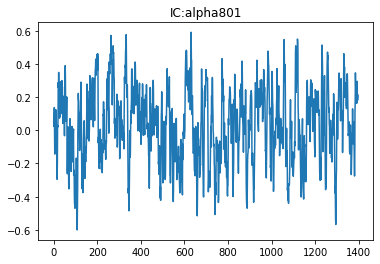

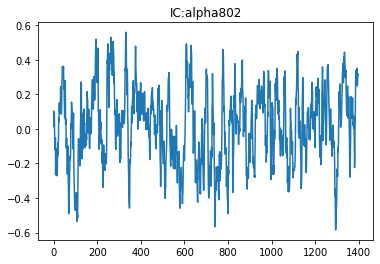

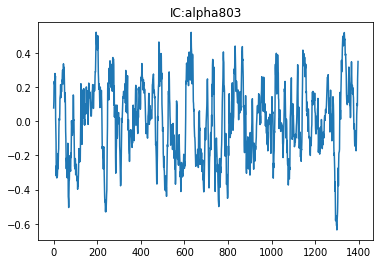

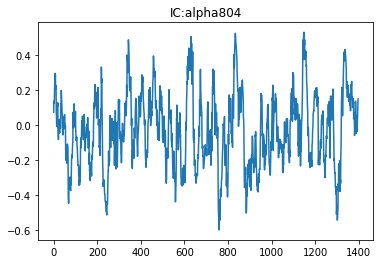

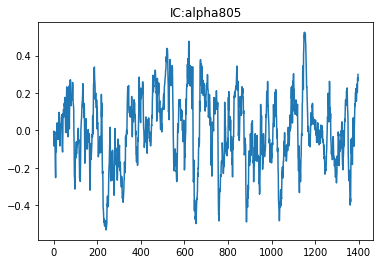

In [21]:
for factor in feature_lst:
    plt.plot(IC.loc[:, [factor]])
    plt.title('IC:%s' %factor)
    plt.show()

In [22]:
# 计算IC均值
ic_mean = IC.iloc[:, 1:].mean()
ic_mean_df = pd.DataFrame(ic_mean, columns=['IC'])

In [23]:
ic_mean_df

,IC
alpha801,0.031064
alpha802,0.017348
alpha803,0.006554
alpha804,-0.029129
alpha805,-0.004390


## IC值大于0比例

In [24]:
IC_over_ratio = over_ratio(IC.iloc[:, 1:], 0)
IC_over_ratio

alpha801    0.562947
alpha802    0.541488
alpha803    0.532904
alpha804    0.449928
alpha805    0.482117
dtype: float64

## ABS(IC)值大于0.02比例

In [25]:
IC_over2_ratio = over_ratio(abs(IC.iloc[:, 1:]), 0.02)
IC_over2_ratio

alpha801    0.935622
alpha802    0.942060
alpha803    0.943491
alpha804    0.917740
alpha805    0.917024
dtype: float64

In [27]:
IR_df = pd.DataFrame(IR, columns=['IR'])
IR_df

,IR
alpha801,0.140529
alpha802,0.080350
alpha803,0.029986
alpha804,-0.141611
alpha805,-0.022648


In [28]:
# # 计算 IC ，IR值,计算rankIC值大于某一阈值的比率
rankIC = rankIC_cal(indicator_df, feature_lst)
rankIR = IR_cal(rankIC)
rankic_mean = rankIC.iloc[:, 1:].mean()
rankic_mean_df = pd.DataFrame(rankic_mean, columns=['rankIC'])
rankic_mean_df

,rankIC
alpha801,0.032538
alpha802,0.014167
alpha803,0.007902
alpha804,-0.030388
alpha805,-0.008815


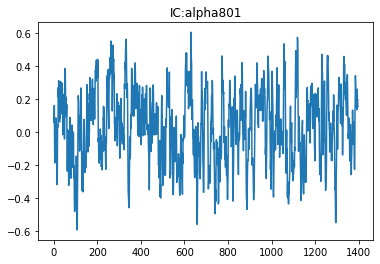

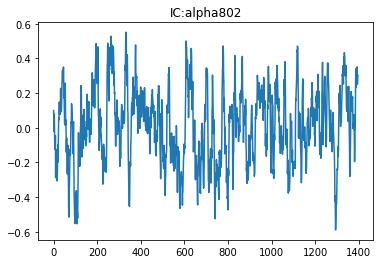

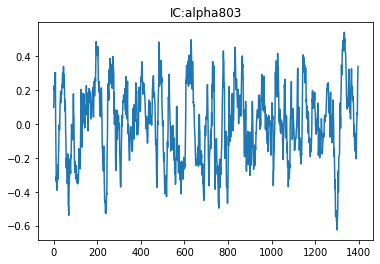

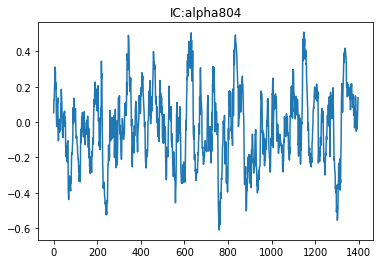

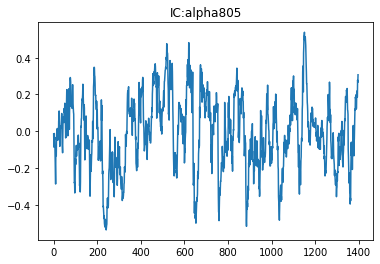

In [29]:
for factor in feature_lst:
    plt.plot(rankIC.loc[:, [factor]])
    plt.title('IC:%s' %factor)
    plt.show()

In [30]:
rankIR

alpha801    0.148818
alpha802    0.065940
alpha803    0.036467
alpha804   -0.147819
alpha805   -0.044382
dtype: float64

## 单因子回归模型

In [31]:
import statsmodels.api as sm
#模型训练
'''
调用模型的fit方法，对模型进行训练
这个训练过程就是参数求解的过程
并对模型进行拟合
'''
# #查看截距
# alpha = lrModel.intercept_[0]

def get_factor_return(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x, hasconst=True).fit()
#     print(model.summary())
    beta = model.params[1]
    tvalue = model.tvalues[1]
#     print('=========%s' % tvalue)
    return beta, tvalue

# 计算回归因子收益值
def f_cal(df, feature_lst):
    num = 0
    for i in feature_lst:
#         print(i)
        t = df.loc[:, ['date_time', 'future_ret', i]].dropna()
        tmp = t.groupby('date_time').apply(lambda df: get_factor_return(df.iloc[:, 2], df.iloc[:, 1])[0]) \
            .reset_index().rename(columns={0: i})
        if num == 0:
            ret = tmp
        else:
            ret = pd.merge(ret, tmp, on=['date_time'], how='outer')
        num += 1
    return ret


# 计算回归因子收益F的t值检验
def t_cal(df, feature_lst):
    num = 0
    for i in feature_lst:
#         print(i)
        t = df.loc[:, ['date_time', 'future_ret', i]].dropna()
        tmp = t.groupby('date_time').apply(lambda df: get_factor_return(df.iloc[:, 2], df.iloc[:, 1])[1]) \
            .reset_index().rename(columns={0: i})
        if num == 0:
            ret = tmp
        else:
            ret = pd.merge(ret, tmp, on=['date_time'], how='outer')
        num += 1
    return ret

In [32]:
F = f_cal(indicator_df, feature_lst)
F

,date_time,alpha801,alpha802,alpha803,alpha804,alpha805
0,2015-01-05,0.007795,0.015924,0.016991,0.017651,-0.000898
1,2015-01-06,0.003562,0.001709,0.022035,0.030479,-0.011401
2,2015-01-07,0.011083,0.005274,0.041293,0.027126,-0.013448
3,2015-01-08,0.019625,0.012428,0.044904,0.028828,-0.000944
4,2015-01-09,-0.002108,-0.001739,0.039052,0.038969,-0.002948
...,...,...,...,...,...,...
1393,2020-09-18,0.048080,0.056707,0.017963,-0.007190,0.038629
1394,2020-09-21,0.030973,0.041622,0.015585,0.001142,0.038330
1395,2020-09-22,0.034223,0.048661,0.043803,0.010640,0.056517
1396,2020-09-23,0.029045,0.047919,0.048594,0.013307,0.050585


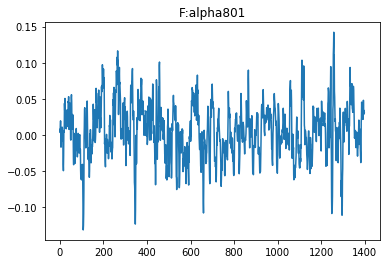

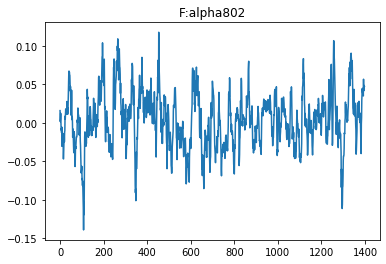

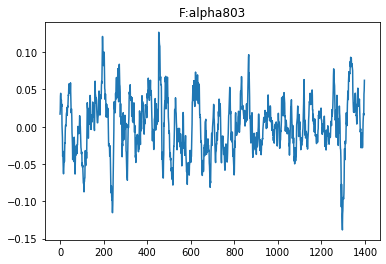

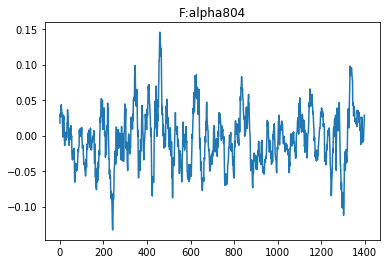

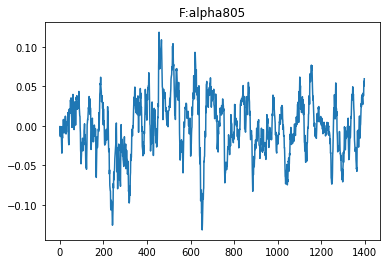

In [33]:
for factor in feature_lst:
    plt.plot(F.loc[:, [factor]])
    plt.title('F:%s' %factor)
    plt.show()

## 因子收益均值

In [34]:
F_mean = F.iloc[:, 1:].mean()
F_mean_df = pd.DataFrame(F_mean, columns=['F'])
F_mean_df

,F
alpha801,0.005662
alpha802,0.003471
alpha803,0.002008
alpha804,-0.004331
alpha805,-0.001146


In [35]:
T_value = t_cal(indicator_df, feature_lst)
T_value

,date_time,alpha801,alpha802,alpha803,alpha804,alpha805
0,2015-01-05,0.269985,0.560457,0.433199,0.395196,-0.026388
1,2015-01-06,0.131548,0.066544,0.649028,0.743476,-0.359026
2,2015-01-07,0.404566,0.211455,1.293126,0.686252,-0.457197
3,2015-01-08,0.757189,0.530143,1.330638,0.760660,-0.032125
4,2015-01-09,-0.085769,-0.076034,1.221106,1.081650,-0.101502
...,...,...,...,...,...,...
1393,2020-09-18,2.023329,2.455375,0.696391,-0.243627,1.387280
1394,2020-09-21,1.297986,1.716000,0.616283,0.038472,1.358952
1395,2020-09-22,1.447046,2.001018,1.682026,0.339349,1.922920
1396,2020-09-23,1.295086,2.204588,2.001499,0.460771,1.807855


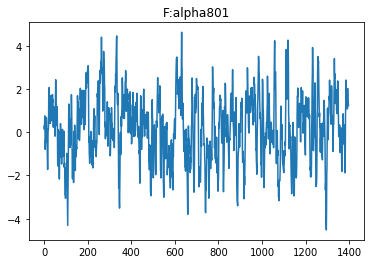

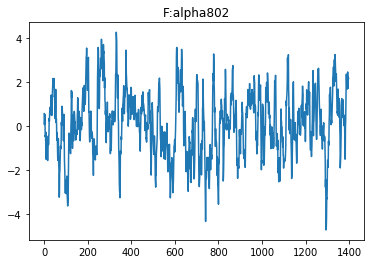

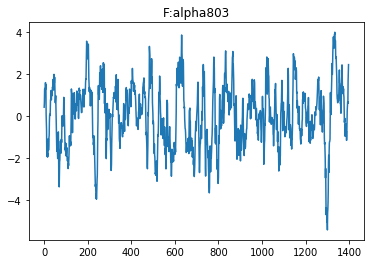

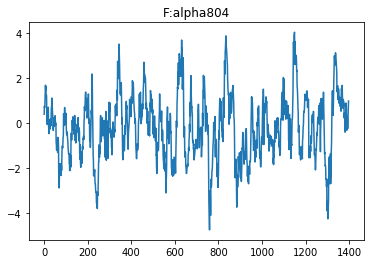

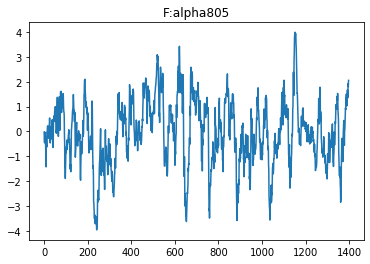

In [36]:
for factor in feature_lst:
    plt.plot(T_value.loc[:, [factor]])
    plt.title('F:%s' %factor)
    plt.show()

## T-value均值

In [37]:
Tvalue_mean = T_value.iloc[:, 1:].mean()
Tvalue_mean_df = pd.DataFrame(Tvalue_mean, columns=['Tvalue'])
Tvalue_mean_df

,Tvalue
alpha801,0.209407
alpha802,0.118442
alpha803,0.039726
alpha804,-0.190573
alpha805,-0.037366


## T-value绝对值均值

In [38]:
Tvalue_abs_mean = abs(T_value.iloc[:, 1:]).mean()
Tvalue_abs_mean_df = pd.DataFrame(Tvalue_abs_mean, columns=['Tvalue'])
Tvalue_abs_mean_df

,Tvalue
alpha801,1.212806
alpha802,1.171100
alpha803,1.181106
alpha804,1.101874
alpha805,1.023541


In [39]:
T_value

,date_time,alpha801,alpha802,alpha803,alpha804,alpha805
0,2015-01-05,0.269985,0.560457,0.433199,0.395196,-0.026388
1,2015-01-06,0.131548,0.066544,0.649028,0.743476,-0.359026
2,2015-01-07,0.404566,0.211455,1.293126,0.686252,-0.457197
3,2015-01-08,0.757189,0.530143,1.330638,0.760660,-0.032125
4,2015-01-09,-0.085769,-0.076034,1.221106,1.081650,-0.101502
...,...,...,...,...,...,...
1393,2020-09-18,2.023329,2.455375,0.696391,-0.243627,1.387280
1394,2020-09-21,1.297986,1.716000,0.616283,0.038472,1.358952
1395,2020-09-22,1.447046,2.001018,1.682026,0.339349,1.922920
1396,2020-09-23,1.295086,2.204588,2.001499,0.460771,1.807855


## T-value>0比率

In [40]:
t_value_over_ratio = over_ratio(T_value.iloc[:, 1:], 0)
t_value_over_ratio

alpha801    0.562947
alpha802    0.541488
alpha803    0.532904
alpha804    0.449928
alpha805    0.482117
dtype: float64

## abs(T-value)>0.02比率

In [41]:
t_abs_value_over_ratio = over_ratio(abs(T_value.iloc[:, 1:]), 0.02)
t_abs_value_over_ratio

alpha801    0.989270
alpha802    0.989986
alpha803    0.989986
alpha804    0.989986
alpha805    0.984263
dtype: float64

## 因子分组组合收益率

In [42]:
indicator_df

,symbol,alpha801,alpha802,alpha803,alpha804,alpha805,date_time,future_ret
0,C,0.622374,0.240210,0.396572,1.000000,1.000000,2015-01-05,0.023262
1,A,0.999936,0.996252,1.000000,0.554643,0.000000,2015-01-05,-0.025774
2,B,0.000000,0.017765,0.026017,0.007123,0.019035,2015-01-05,-0.017737
3,M,0.199420,0.161954,0.086834,0.113559,0.520720,2015-01-05,-0.046827
4,RM,0.238064,0.275609,0.470942,0.128976,0.000000,2015-01-05,-0.050639
...,...,...,...,...,...,...,...,...
58326,JD,0.742197,0.426609,0.042454,0.095377,0.284017,2020-09-24,0.088940
58327,AP,0.396588,0.503457,0.195897,0.158232,0.250602,2020-09-24,-0.002880
58328,CJ,0.084692,0.895952,1.000000,0.556933,0.298966,2020-09-24,0.004774
58329,CF,0.650021,0.909230,0.916795,0.640795,0.959959,2020-09-24,0.133917


In [55]:
def transfer_y_to_feature(ret_lst):
    temp0 = np.percentile(ret_lst,100/5)
    temp1 = np.percentile(ret_lst,200/5)
    temp2 = np.percentile(ret_lst,300/5)
    temp3 = np.percentile(ret_lst,400/5)
#     print(temp0,temp1)
    y_lst = []
    for y in ret_lst:
        if y > temp3:
            y_lst.append(1)
        elif y > temp2:
            y_lst.append(2)
        elif y > temp1:
            y_lst.append(3)
        elif y > temp0:
            y_lst.append(4)
        else:
            y_lst.append(5)
    return y_lst

In [61]:
lst = []
ls_lst = []
for date, group in indicator_df.groupby(['date_time']):
#     print(date)
    for feature in feature_lst:
        temp = group.loc[:, [feature, 'future_ret']]
        y_feature_lst = transfer_y_to_feature(temp[feature])
        temp['y'] = y_feature_lst
#         print(temp)
        ret = temp.loc[:, ['y', 'future_ret']].groupby(['y']).mean()['future_ret'].tolist()
#         print(ret)
        row = [date, feature]
        row.extend(ret)
        lst.append(row)
        ls_row = [date, feature]
        ls_row.append(ret[0] - ret[-1])
        ls_lst.append(ls_row)
ret_group = pd.DataFrame(lst, columns=['date_time', 'factor', 'group1', 'group2', 'group3', 'group4', 'group5'])
ret_ls = pd.DataFrame(ls_lst, columns=['date_time', 'factor', 'ret_hedge'])
ret_group

,date_time,factor,group1,group2,group3,group4,group5
0,2015-01-05,alpha801,-0.020576,-0.001865,-0.078418,-0.015441,-0.023314
1,2015-01-05,alpha802,-0.027245,0.013030,-0.083364,0.001363,-0.039574
2,2015-01-05,alpha803,-0.029288,-0.031885,-0.007987,-0.034277,-0.033094
3,2015-01-05,alpha804,-0.026840,-0.039528,-0.016213,-0.028211,-0.027139
4,2015-01-05,alpha805,-0.023289,-0.038284,-0.021626,-0.020263,-0.032221
...,...,...,...,...,...,...,...
6985,2020-09-24,alpha801,0.022078,0.060592,0.030708,0.013541,0.016463
6986,2020-09-24,alpha802,0.047214,0.056320,0.018410,0.004010,0.017428
6987,2020-09-24,alpha803,0.066693,0.019714,0.042771,0.022626,-0.008422
6988,2020-09-24,alpha804,0.021383,0.025336,0.059971,0.038597,-0.001904


       date_time    factor    group1    group2    group3    group4    group5
0     2015-01-05  alpha801 -0.020576 -0.001865 -0.078418 -0.015441 -0.023314
5     2015-01-06  alpha801 -0.004918 -0.028149 -0.039079 -0.038178 -0.016741
10    2015-01-07  alpha801 -0.023747 -0.004122 -0.031854 -0.009626 -0.032249
15    2015-01-08  alpha801 -0.018615 -0.011408 -0.032203 -0.010544 -0.032949
20    2015-01-09  alpha801 -0.011162 -0.000306 -0.007545 -0.029650  0.011674
...          ...       ...       ...       ...       ...       ...       ...
6965  2020-09-18  alpha801  0.009608  0.048739 -0.022278 -0.004959 -0.017748
6970  2020-09-21  alpha801  0.054578 -0.006112  0.004318 -0.001176  0.006186
6975  2020-09-22  alpha801  0.032101  0.059331  0.021331  0.004636  0.021671
6980  2020-09-23  alpha801  0.024520  0.066029  0.015532  0.013285  0.014699
6985  2020-09-24  alpha801  0.022078  0.060592  0.030708  0.013541  0.016463

[1398 rows x 7 columns]
       date_time    factor    group1    group2    g

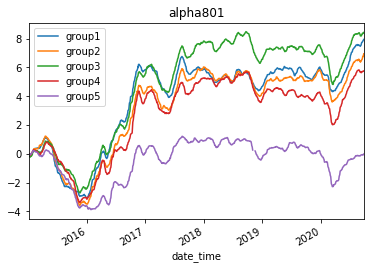

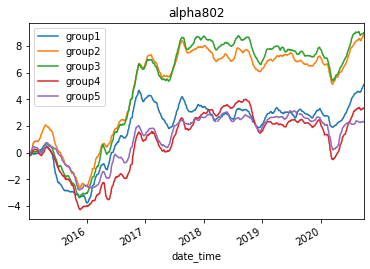

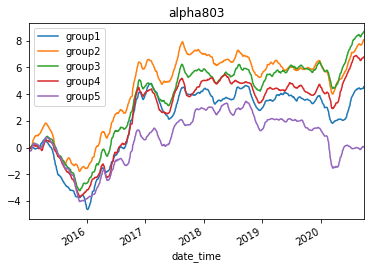

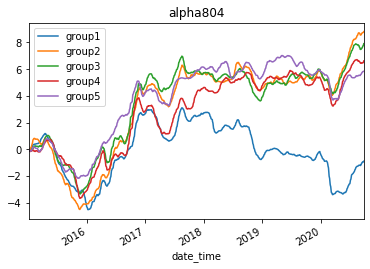

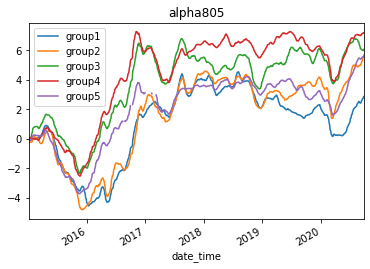

In [67]:
for feature, group in ret_group.groupby(['factor']):
#     print(group)
    group = group.drop(['factor'], axis=1).set_index(['date_time']).cumsum()
#     print(group)
    group.index = pd.to_datetime(group.index)
    group.plot(legend=0)
    plt.legend()
    plt.title('%s' %(feature))   

## 因子多空收益率

In [62]:
ret_ls

,date_time,factor,ret_hedge
0,2015-01-05,alpha801,0.002738
1,2015-01-05,alpha802,0.012330
2,2015-01-05,alpha803,0.003806
3,2015-01-05,alpha804,0.000300
4,2015-01-05,alpha805,0.008932
...,...,...,...
6985,2020-09-24,alpha801,0.005615
6986,2020-09-24,alpha802,0.029786
6987,2020-09-24,alpha803,0.075116
6988,2020-09-24,alpha804,0.023287


       date_time    factor  ret_hedge
0     2015-01-05  alpha801   0.002738
5     2015-01-06  alpha801   0.011823
10    2015-01-07  alpha801   0.008502
15    2015-01-08  alpha801   0.014334
20    2015-01-09  alpha801  -0.022836
...          ...       ...        ...
6965  2020-09-18  alpha801   0.027355
6970  2020-09-21  alpha801   0.048393
6975  2020-09-22  alpha801   0.010430
6980  2020-09-23  alpha801   0.009822
6985  2020-09-24  alpha801   0.005615

[1398 rows x 3 columns]
       date_time    factor  ret_hedge
1     2015-01-05  alpha802   0.012330
6     2015-01-06  alpha802  -0.019116
11    2015-01-07  alpha802  -0.011183
16    2015-01-08  alpha802   0.012217
21    2015-01-09  alpha802  -0.021816
...          ...       ...        ...
6966  2020-09-18  alpha802   0.049458
6971  2020-09-21  alpha802   0.050966
6976  2020-09-22  alpha802   0.025002
6981  2020-09-23  alpha802   0.044449
6986  2020-09-24  alpha802   0.029786

[1398 rows x 3 columns]
       date_time    factor  ret_hedge


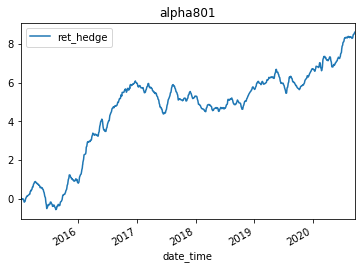

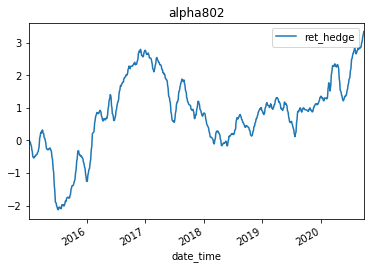

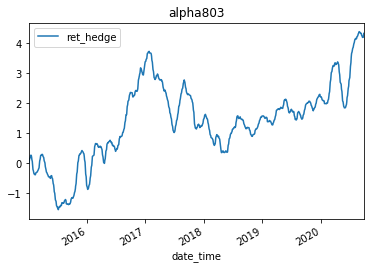

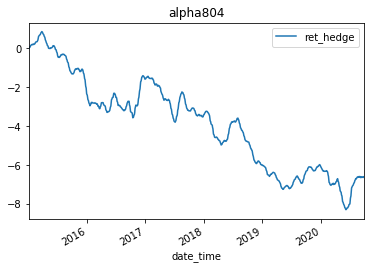

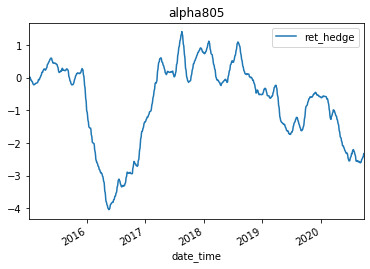

In [65]:
for feature, group in ret_ls.groupby(['factor']):
    print(group)
    group = group.drop(['factor'], axis=1).set_index(['date_time']).cumsum()
#     print(group)
    group.index = pd.to_datetime(group.index)
    group.plot(legend=0)
    plt.legend()
    plt.title('%s' %(feature))  